In [1]:
import librosa
import numpy as np
from scipy.spatial.distance import cdist
from IPython.display import Audio
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time


import random

import json

with open('../output.jsonl', 'r') as json_file:
    json_list = list(json_file)

events = []
for json_str in json_list:
    result = json.loads(json_str)
    events.append(result)

events[-1]

{'event_times': {'10.33.1.82': 1732471767.4038649,
  '10.33.1.105': 1732471764.087499,
  '10.33.1.149': 1732471764.1453},
 'coord_dict': {'10.33.1.105': [0, 0],
  '10.33.1.149': [1, 0],
  '10.33.1.82': [0.5, 0.866],
  'source': [196.03009867943254, 746963.0402582065]},
 'amplitude': 5.203858852386475}

In [42]:
# # Basic 
# scale = 100000000
# fig, ax = plt.subplots()

# for i, d in enumerate(events):
#     x = [z[0] for z in d["coord_dict"].values()]
#     y = [z[1] for z in d["coord_dict"].values()]
    
#     x = [z[0] for z in d["coord_dict"].values()]
#     y = [z[1] for z in d["coord_dict"].values()]
#     if i==0:
#         ax.scatter(np.array(x[:3])*scale,np.array(y[:3])*scale,c='red')
#     ax.scatter(x[-1:],y[-1:],c='blue', s=1.5**d["amplitude"])
    
#     # Display the figure and clear the output
#     display(fig)
#     clear_output(wait=True)
#     time.sleep(0.5)
#     # break

# # Final plot display to retain the last state
# # display(fig)

### Listen to stream & plot output

KeyboardInterrupt: 

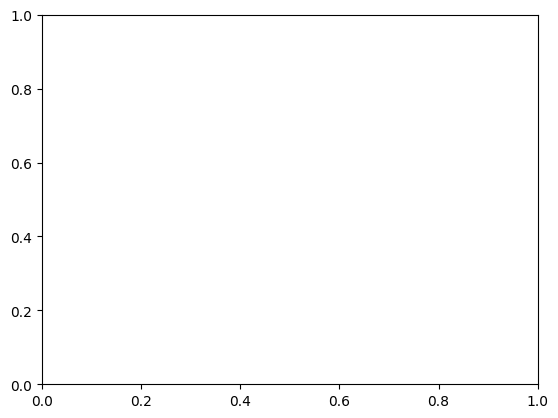

In [44]:
# Reading in stream
import time
import json
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output, display

def follow(file):
    file.seek(0, 2)  # Move to the end of the file
    while True:
        line = file.readline()
        if not line:
            time.sleep(0.1)  # Briefly wait for new data
            continue
        yield line

# Open the file
with open('../output.jsonl', 'r') as f:
    scale = 100
    fig, ax = plt.subplots()
    first_iteration = True
    for line in follow(f):
        result = json.loads(line)
        # plt.xlim(-2*scale,2*scale)
        # plt.ylim(-2*scale,2*scale)
        x = [z[0] for z in result["coord_dict"].values()]
        y = [z[1] for z in result["coord_dict"].values()]
        if first_iteration:
            ax.scatter(np.array(x[:3])*scale, np.array(y[:3])*scale, c='red')
            first_iteration = False
        ax.scatter(x[-1:], y[-1:], c='blue')
        # Display the figure and clear the output
        display(fig)
        clear_output(wait=True)
        time.sleep(0.5)


## Create readme-GIF

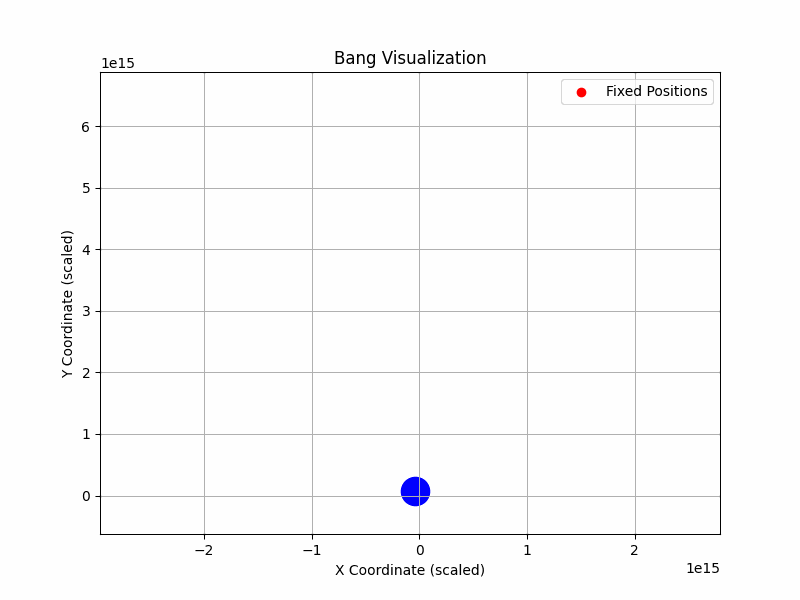

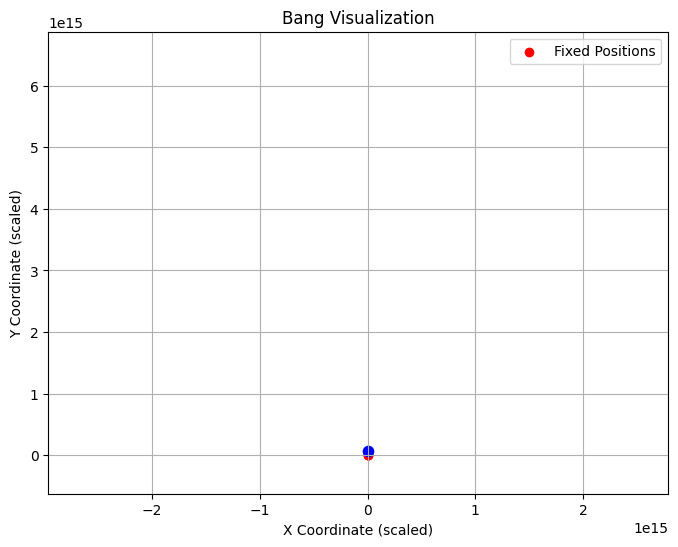

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image

# Assume `events` is defined and follows your format
scale = 1e8

# Collect all x, y, and amplitude values
all_x, all_y, all_amplitudes = [], [], []
for d in events:
    coords = list(d["coord_dict"].values())
    x_vals = [coord[0] for coord in coords]
    y_vals = [coord[1] for coord in coords]
    all_x.extend(x_vals)
    all_y.extend(y_vals)
    all_amplitudes.append(d["amplitude"])

# Ensure amplitudes are positive for logarithmic scaling
all_amplitudes = np.array(all_amplitudes)
if np.any(all_amplitudes <= 0):
    # Adjust amplitudes to be positive
    min_positive_amp = np.min(all_amplitudes[all_amplitudes > 0])
    small_value = min_positive_amp * 0.01
    all_amplitudes = np.where(all_amplitudes <= 0, small_value, all_amplitudes)

# Compute logarithm of amplitudes
log_amplitudes = np.log(all_amplitudes)
log_min_amp, log_max_amp = np.min(log_amplitudes), np.max(log_amplitudes)

# Scale coordinates
all_x = np.array(all_x) * scale
all_y = np.array(all_y) * scale

# Calculate axis limits with margins
x_margin = (max(all_x) - min(all_x)) * 0.1
y_margin = (max(all_y) - min(all_y)) * 0.1
x_limits = (min(all_x) - x_margin, max(all_x) + x_margin)
y_limits = (min(all_y) - y_margin, max(all_y) + y_margin)

# Fixed positions (first 3 points)
fixed_coords = list(events[0]["coord_dict"].values())[:3]
x_fixed = [coord[0] * scale for coord in fixed_coords]
y_fixed = [coord[1] * scale for coord in fixed_coords]

# Amplitude scaling for marker sizes
min_size, max_size = 50, 500

fig, ax = plt.subplots(figsize=(8, 6))
fixed_scatter = ax.scatter(x_fixed, y_fixed, c='red', label='Fixed Positions')

# Set plot aesthetics
ax.set_xlabel('X Coordinate (scaled)')
ax.set_ylabel('Y Coordinate (scaled)')
ax.set_title('Bang Visualization')
ax.set_xlim(x_limits)
ax.set_ylim(y_limits)
ax.grid(True)
ax.legend()

# Set logarithmic scale for axes if all coordinates are positive
if np.min(all_x) > 0 and np.min(all_y) > 0:
    ax.set_xscale('log')
    ax.set_yscale('log')

# Initialize the bang point using ax.scatter
bang_scatter = ax.scatter([], [], c='blue', s=[], label='Bang')

# Function to update the animation
def update(frame):
    d = events[frame]
    coords = list(d["coord_dict"].values())
    x_bang = coords[-1][0] * scale
    y_bang = coords[-1][1] * scale
    amplitude = d["amplitude"]

    # Adjust amplitude if necessary
    if amplitude <= 0:
        amplitude = small_value

    # Scale marker size based on logarithm of amplitude
    size = ((np.log(amplitude) - log_min_amp) / (log_max_amp - log_min_amp)) * (max_size - min_size) + min_size

    # Update the bang point
    bang_scatter.set_offsets([[x_bang, y_bang]])
    bang_scatter.set_sizes([size])

    return bang_scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(events)), blit=True, repeat=False)

# Save the animation as a GIF
ani.save('bang_visualization.gif', writer='pillow', fps=2)

# Display the GIF in Jupyter Notebook (optional)
Image(filename='bang_visualization.gif')
